# Activity 1.2 : Training Neural Networks


Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2025-2026
<u>**Hands-on Activity 4.2** | **Support Vector Machines**
**Name** | Adrian Justin Bulambao
**Section** | CPE32S3
**Date Performed**: | January 12, 2026
**Date Submitted**: | January 12, 2026
**Instructor**: | Engr. Neal Barton James Matira


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [3]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
425,4,184,78,39,277,37.0,0.264,31,1
289,5,108,72,43,75,36.1,0.263,33,0
757,0,123,72,0,0,36.3,0.258,52,1
95,6,144,72,27,228,33.9,0.255,40,0
588,3,176,86,27,156,33.3,1.154,52,1


In [6]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\JUSTIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [12]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [13]:
model.compile(SGD(.003), "binary_crossentropy", metrics=["binary_accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5573 - loss: 0.7343 - val_binary_accuracy: 0.5156 - val_loss: 0.7394
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5712 - loss: 0.7282 - val_binary_accuracy: 0.5312 - val_loss: 0.7336
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5816 - loss: 0.7223 - val_binary_accuracy: 0.5417 - val_loss: 0.7279
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5938 - loss: 0.7165 - val_binary_accuracy: 0.5417 - val_loss: 0.7224
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6024 - loss: 0.7110 - val_binary_accuracy: 0.5469 - val_loss: 0.7171
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6076 - loss: 0.7057 - val_binary_accuracy: 0.5469 - val_loss: 0.7120
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6128 - loss: 0.7005 - val_binary_accuracy: 0.5625 - val_loss: 0.7070
Epoch 8/200
1

In [14]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 >= 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [15]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [16]:
y_pred_prob_nn_1[:10]

array([[0.37821943],
       [0.6796472 ],
       [0.29391107],
       [0.25427482],
       [0.16245264],
       [0.51443344],
       [0.06198262],
       [0.40985057],
       [0.7265936 ],
       [0.3333104 ]], dtype=float32)

Create the plot_roc function

In [17]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.781
roc-auc is 0.816


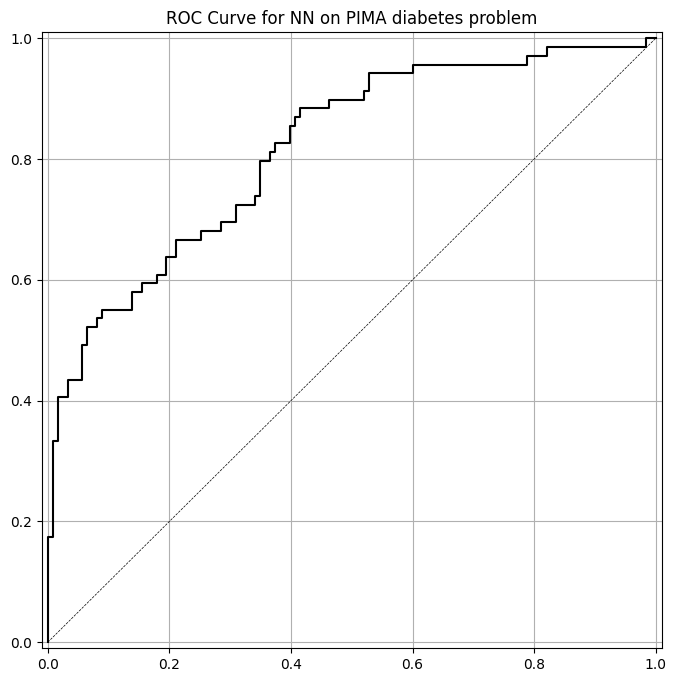

In [18]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [19]:
run_hist_1.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

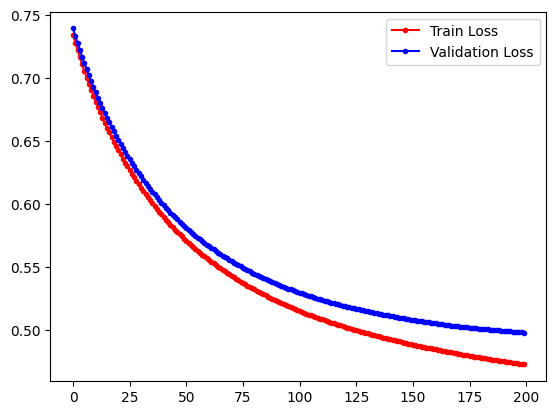

In [20]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

The ANN model is not overfitting and underfitting. It is just right.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [24]:
df = pd.read_csv("pima-indians-diabetes.csv", names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"])
df.head()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.isnull().sum()

times_pregnant            0
glucose_tolerance_test    0
blood_pressure            0
skin_thickness            0
insulin                   0
bmi                       0
pedigree_function         0
age                       0
has_diabetes              0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.describe()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


there seems to be zeroes in the dataset that indicates NaN

In [29]:
df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']] = df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']].replace(0, np.nan)

In [30]:
df.isnull().sum()

times_pregnant              0
glucose_tolerance_test      5
blood_pressure             35
skin_thickness            227
insulin                   374
bmi                        11
pedigree_function           0
age                         0
has_diabetes                0
dtype: int64

In [31]:
df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']] = df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']].fillna(df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']].mean())

In [32]:
# spplitting the data
X = df.drop(columns=['has_diabetes'])
y = df['has_diabetes']

<Axes: xlabel='has_diabetes', ylabel='count'>

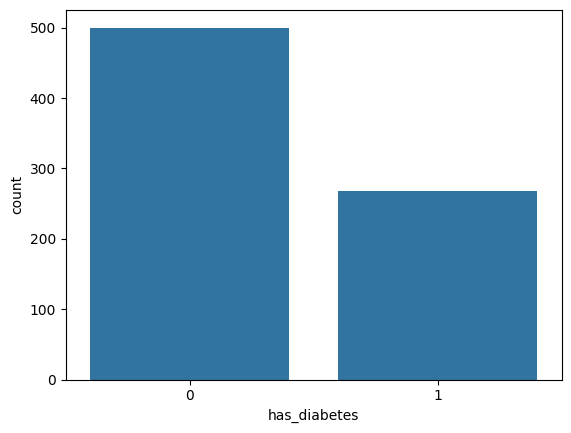

In [33]:
sns.countplot(data=df,x=y)

In [39]:
import pandas as pd

# Assuming your dataset is called df
df_0 = df[df['has_diabetes'] == 0]
df_1 = df[df['has_diabetes'] == 1]

df_0_under = df_0.sample(n=len(df_1), random_state=42)

df_balanced = pd.concat([df_0_under, df_1])


df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['has_diabetes'].value_counts())


has_diabetes
0    268
1    268
Name: count, dtype: int64


In [44]:
X = df_balanced.drop(columns=['has_diabetes'])
y = df_balanced['has_diabetes']

<Axes: xlabel='has_diabetes', ylabel='count'>

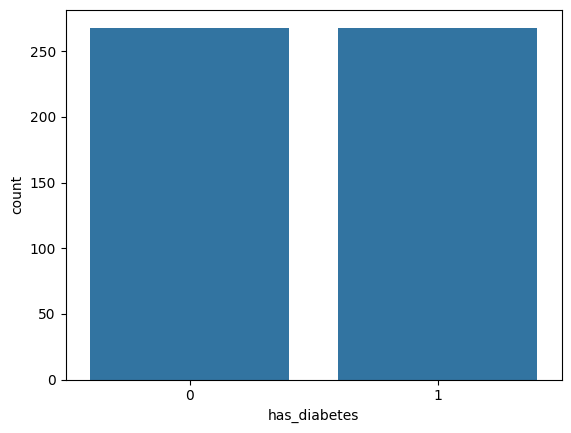

In [45]:
sns.countplot(data=df,x=y)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)

SS = StandardScaler()

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(402, 8)
(134, 8)
(402,)
(134,)


In [49]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [52]:
input = Input((8,), name = 'Surfacelayer')

X = Dense(6, activation = 'relu', name = 'L1')(input)
X = Dense(6, activation = 'relu', name = 'L2')(X)

output = Dense(1, activation = "sigmoid", name = 'OutputLayer')(X)

model_diabetes = Model(inputs = input, outputs = output, name = 'diabetesANN')
model_diabetes.compile(optimizer= SGD(learning_rate = 0.003), loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [53]:
model_diabetes.summary()

Model: "diabetesANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Surfacelayer (InputLayer)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = EarlyStopping(monitor = 'val_accuracy', patience = 100, mode = 'max', restore_best_weights = True)

In [55]:
diabetes_model = model_diabetes.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1500, callbacks = [checkpoint])


Epoch 1/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.5174 - loss: 0.8651 - val_binary_accuracy: 0.4478 - val_loss: 0.9000
Epoch 2/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5124 - loss: 0.8523 - val_binary_accuracy: 0.4478 - val_loss: 0.8853
Epoch 3/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5124 - loss: 0.8408 - val_binary_accuracy: 0.4478 - val_loss: 0.8719
Epoch 4/1500
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.5625 - loss: 0.7933

c:\Users\JUSTIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: binary_accuracy,loss,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5100 - loss: 0.8302 - val_binary_accuracy: 0.4478 - val_loss: 0.8592
Epoch 5/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5100 - loss: 0.8203 - val_binary_accuracy: 0.4403 - val_loss: 0.8473
Epoch 6/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5100 - loss: 0.8110 - val_binary_accuracy: 0.4478 - val_loss: 0.8365
Epoch 7/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5075 - loss: 0.8027 - val_binary_accuracy: 0.4478 - val_loss: 0.8265
Epoch 8/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5075 - loss: 0.7950 - val_binary_accuracy: 0.4552 - val_loss: 0.8174
Epoch 9/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5100 - loss: 0.7880 - val_binary_accuracy: 0.4552 - val_loss: 0.8087
Epoch 10/1500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5075 - loss: 0.7813 - val_binary_accuracy: 0.4552 - val_loss: 0.8008
Epoch 11/1500
13/1

In [57]:
y_pred_prob = model_diabetes.predict(x_test)

y_pred =  (y_pred_prob >= 0.5).astype(int)
# convert multi dim array to single dim array
y_pred = y_pred.ravel()
y_pred_prob = y_pred_prob.ravel()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70        60
           1       0.77      0.68      0.72        74

    accuracy                           0.71       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.72      0.71      0.71       134



In [60]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

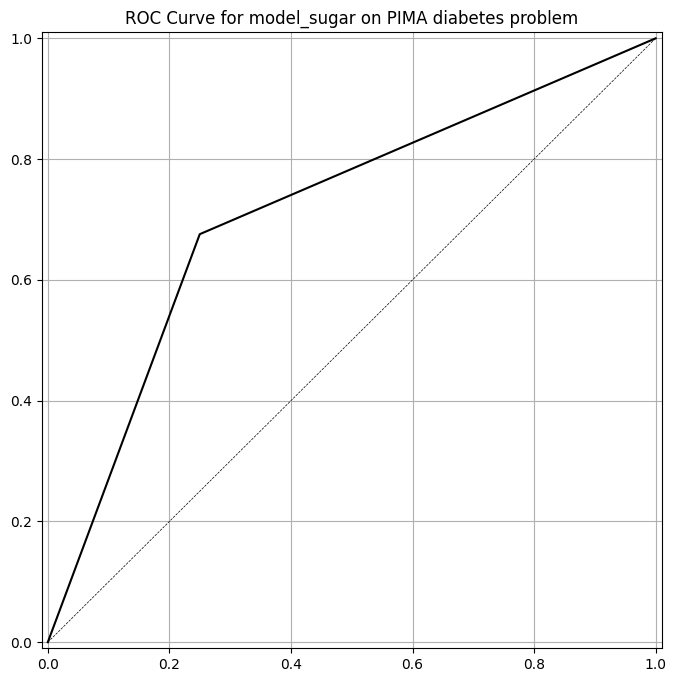

In [61]:
plot_roc(y_test,y_pred, 'model_sugar')

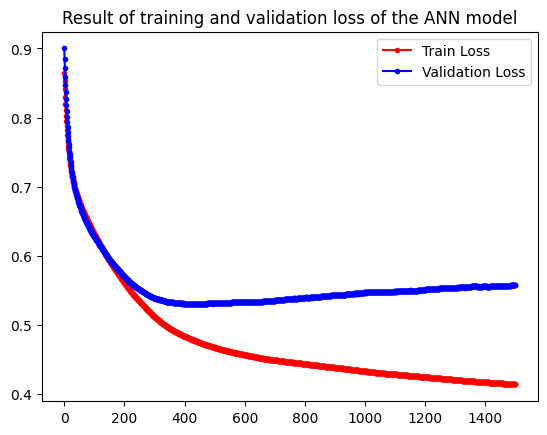

In [63]:
fig, ax = plt.subplots()
ax.plot(diabetes_model.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(diabetes_model.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss of the ANN model")
plt.show()

In [207]:
input = Input((8,), name= 'I1')

X = Dense(64, activation = 'relu', name = 'D1')(input)
X = Dense(16, activation = 'relu', name = 'D2')(X)

output = Dense(1, activation = 'sigmoid', name = 'O1')(X)

model_sugar_ANN = Model(inputs= input, outputs = output, name= 'sugar')

# instead of using the sgd as optimizer
# I will just use the Adam(learning_rate = 0.001) which is default in "adam"
model_sugar_ANN.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [208]:
model_sugar_ANN.summary()

Model: "sugar"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ I1 (InputLayer)                 │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D1 (Dense)                      │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D2 (Dense)                      │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ O1 (Dense)                      │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
sugar_hist_new = model_sugar_ANN.fit(x_train, y_train, epochs=150, steps_per_epoch = 200, validation_data = (x_test,y_test))


Epoch 1/150


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.6891 - loss: 0.5953 - val_accuracy: 0.7015 - val_loss: 0.5237
Epoch 2/150
 70/200 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.7132 - loss: 0.5148

c:\Users\JUSTIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7562 - loss: 0.4918 - val_accuracy: 0.6940 - val_loss: 0.5125
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7612 - loss: 0.4658 - val_accuracy: 0.7090 - val_loss: 0.5178
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7736 - loss: 0.4501 - val_accuracy: 0.7164 - val_loss: 0.5208
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7811 - loss: 0.4391 - val_accuracy: 0.7313 - val_loss: 0.5189
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8010 - loss: 0.4280 - val_accuracy: 0.7164 - val_loss: 0.5241
Epoch 7/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8035 - loss: 0.4175 - val_accuracy: 0.7239 - val_loss: 0.5249
Epoch 8/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8035 - loss: 0.4122 - val_accuracy: 0.7164 - val_loss: 0.5425
Epoch 9/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8035 - loss: 0.4025 - val_

In [210]:
y_pred_prob_new = model_sugar_ANN.predict(x_test)
y_pred_new = (y_pred_prob_new >= 0.5).astype(int)
y_pred_prob_new = y_pred_prob_new.ravel()
y_pred_new = y_pred_new.ravel()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [211]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.61      0.78      0.69        60
           1       0.77      0.59      0.67        74

    accuracy                           0.68       134
   macro avg       0.69      0.69      0.68       134
weighted avg       0.70      0.68      0.68       134



<Axes: >

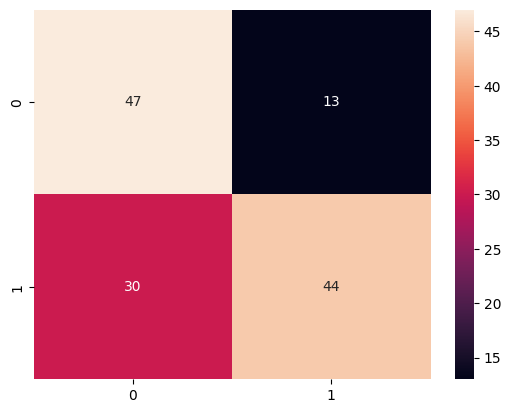

In [212]:
# graph the confusion matrix
latest_mat = confusion_matrix(y_test,y_pred_new)

sns.heatmap(latest_mat, fmt= '.2g', annot = True)

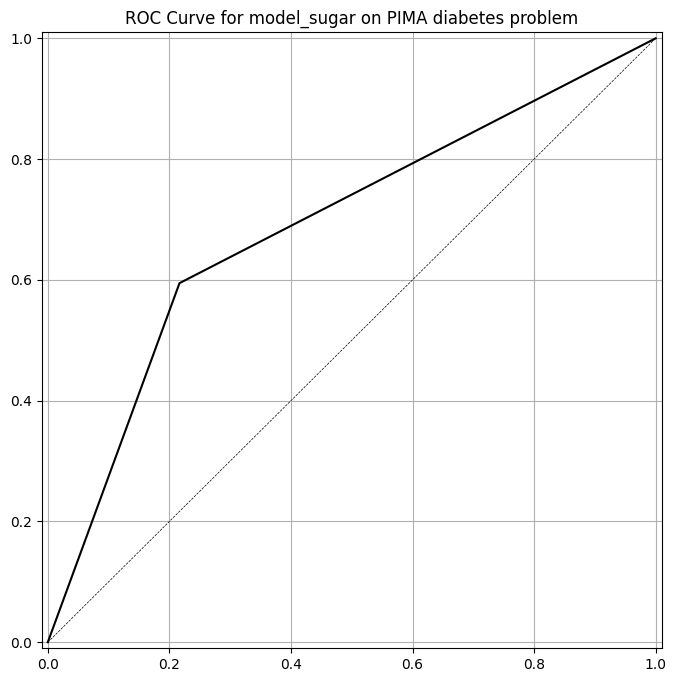

In [213]:
plot_roc(y_test,y_pred_new, 'model_sugar')

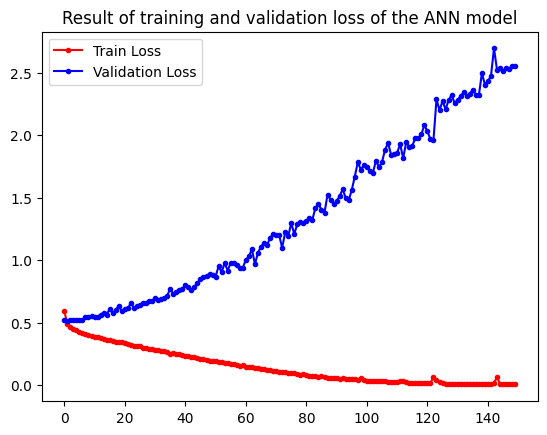

In [214]:
fig, ax = plt.subplots()
ax.plot(sugar_hist_new.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(sugar_hist_new.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss of the ANN model")
plt.show()

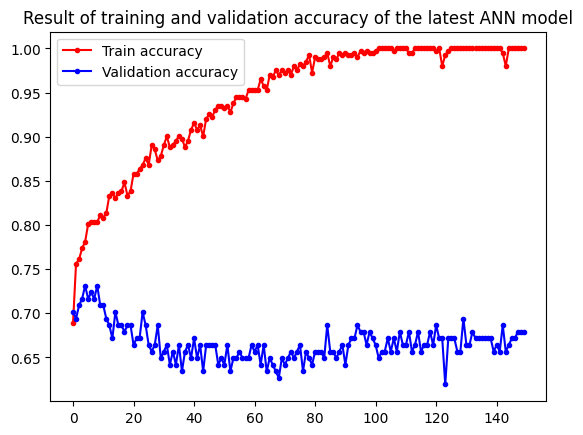

In [215]:
fig, ax = plt.subplots()
ax.plot(sugar_hist_new.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(sugar_hist_new.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()
ax.set(title=f"Result of training and validation accuracy of the latest ANN model")
plt.show()

Observation:

Even after balancing out the dataset, it seems that the model has overfit, it could either be due to the balancing of the dataset, or the layers of the model.

#### Conclusion

After completing the activity, I learned how to train neural networks using the TensorFlow API and how to tune models. I realized that even adding multiple hidden layers or tuning for a long time does not prevent underfitting or overfitting if the data is not clean or has class bias. Most of my time was spent on data cleaning rather than model tuning. Overall,  even though I was not able to have the desired accuracy I was able to learn insights for future references.